In [1]:
from matplotlib import pyplot as plt
from data_prep import DataPrep
from data_binning import DataBinning
from gsm_data import GSMData
from pygsm2016 import GlobalSkyModel2016

# Creating gsm calibration data (power-ish) from selections

In [ ]:
year = '2021'
instrument = '100MHz'
channel = 'NS'
calibration_type = 'GSM'

d = DataPrep(instrument, channel, year)
cal_data, sidereal_times = d(calibration_type)

In [ ]:
#I normally save the output of the dataprep since I run into memory issues and experience crashes
with open(f'/Volumes/SSData/GSM_Cal_Power_and_Times/{year}/{instrument}_{channel}_{year}.npz', 'wb') as g:
    np.savez(g, power=cal_data, times=sidereal_times)   

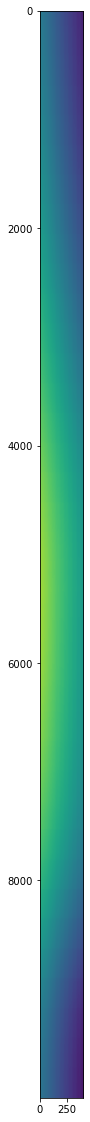

In [20]:
plt.figure(1, figsize=(20, 20))
plt.imshow(np.log10(cal_data[150000:160000,1200:1600]), vmin=8.5, vmax=9.5)

# Removing RFI and Binning Antenna Data

In [ ]:
minperbin = 2
flow = 50
fhigh = 150

In [ ]:
alldata = np.load(f'/Volumes/SSData/GSM_Cal_Power_and_Times/{year}/{instrument}_{channel}_{year}.npz')
data = alldata['power']
times = alldata['times']

In [ ]:
b = DataBinning(data, times, minperbin, flow, fhigh)
final_data = b()

# Get GSM data if doing GSM cal

In [ ]:
#TODO: Make gsm data creation into a class and speed it up (let person choose minperbin, flow and fhigh)

In [ ]:
with open('100MHz_EW_GSM_average' +'.npy', 'rb') as f:
        Tgsm = np.load(f)

In [ ]:
if calibration_type == 'GSM':
    g = GSMData(channel, minperbin, flow, fhigh)
    Tgsm = g()
else:
    pass

# Do calibrations/comparisons